# Paper Figures - Mississippi River Tank Data [Equilibrium]

## Getting setup

Python loads

In [1]:
from math import nan
import numpy as np
import os as os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib widget
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display
import datetime

# Set plot parameters -----------------------

plt.rcParams.update({'font.size': 8})
# ------ Half Page Width --------------------
wHP = 3.
hHP = 2.25
# ------ Full Page Width --------------------
wFP = 6
hFP = 3

## Data
Get the working directory and a list of folders that contain data by experiment

In [2]:
working = os.getcwd()
files = sorted(glob(working+"/Equilibrium/*"))
for i in range(0,len(files)):
    print('Data directory:',files[i],'(index:',i,')')

Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Equilibrium/02_Equilibrium_Data copy.csv (index: 0 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Equilibrium/02_Equilibrium_Data.csv (index: 1 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Equilibrium/03_Equilibrium_Data_Mod.csv (index: 2 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Equilibrium/MS_insitu_withG.csv (index: 3 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Equilibrium/MississippiConditions.csv (index: 4 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Equilibrium/d_mu_ASTM_seasalt.csv (index: 5 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Equilibrium/d_mu_GoM_water.csv (index: 6 )


In [3]:
# select the equilibrium data to pull in ------------------------------

j = 2  # equilibrium data from tank experiments
k = 3  # data from in situ measurements of Osborn et al. (2023)

l = 5  # data for histogram of particle sizes with ASTM sea salt
m = 6  # data for histogram of particle sizes with GoM water

# pull the data in ----------------------------------------------------

data = pd.read_csv(files[j])
data_MS = pd.read_csv(files[k])

datafr1 = pd.read_csv(files[l]) # used later on
datafr2 = pd.read_csv(files[m]) # used later on

# sort the data --------------------------------------------------------

trust_level = 0.5

# broken down by season and then salt/water type

summer_all = data[(data['Season'] == 'Summer') & (data['Trust_factor'] >= trust_level)].copy()
winter_all  = data[(data['Season'] == 'Winter') & (data['Trust_factor'] >= trust_level)].copy()

summer_fresh = data[(data['Season'] == 'Summer') & (data['S_eq_ppt'] == 0) & (data['Trust_factor'] >= trust_level)].copy()
winter_fresh  = data[(data['Season'] == 'Winter') & (data['S_eq_ppt'] == 0) & (data['Trust_factor'] >= trust_level)].copy()

summer_GoM = data[(data['Season'] == 'Summer') & (data['GoM_water_present'] == 1) & (data['Trust_factor'] >= trust_level)].copy()
winter_GoM  = data[(data['Season'] == 'Winter') & (data['GoM_water_present'] == 1) & (data['Trust_factor'] >= trust_level)].copy()

summer_GoM_no = data[(data['Season'] == 'Summer') & (data['GoM_water_present'] == 0) & (data['S_eq_ppt'] > 0)& (data['Trust_factor'] >= trust_level)].copy()
winter_GoM_no  = data[(data['Season'] == 'Winter') & (data['GoM_water_present'] == 0) & (data['S_eq_ppt'] > 0)& (data['Trust_factor'] >= trust_level)].copy()

summer_MS = data_MS[(data_MS['Season'] == 'Summer')].copy()
winter_MS = data_MS[(data_MS['Season'] == 'Winter')].copy()

# broken down by salt/water type

GoM_yes  = data[(data['GoM_water_present'] == 1) & (data['Trust_factor'] >= trust_level)].copy()
GoM_no  = data[(data['GoM_water_present'] == 0) & (data['S_eq_ppt'] > 0) & (data['Trust_factor'] >= trust_level)].copy()
S0  = data[(data['S_eq_ppt'] == 0) & (data['Trust_factor'] >= trust_level)].copy()

## Plots

### d vs G by salt type

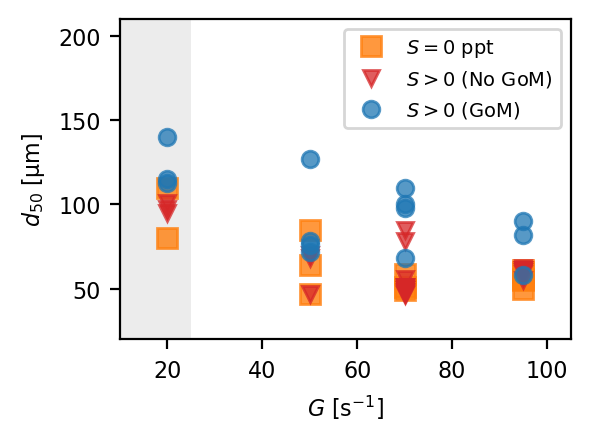

In [4]:
Gmin = 10
Gmax = 105
dmin = 20
dmax = 210

fig, ax = plt.subplots(figsize=(wHP,hHP))

ax.plot(S0['G_eq_Hz'], S0['d50_eq_um'],
        color='C1', marker='s', linestyle='none', ms = 7, alpha=0.8,  label='$S=0$ ppt')

ax.plot(GoM_no['G_eq_Hz'], GoM_no['d50_eq_um'],
        color='C3', marker='v', linestyle='none', alpha=0.75, label='$S>0$ (No GoM)')

ax.plot(GoM_yes['G_eq_Hz'], GoM_yes['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.75, label='$S>0$ (GoM)')

ax.axvspan(Gmin, 25, color='gray', alpha=0.15, lw=0)

ax.set_xlabel('$G$ [$\mathrm{s^{-1}}$]')
ax.set_ylabel('$d_{50}$ [µm]')
ax.set_xlim(Gmin,Gmax)
ax.set_ylim(dmin,dmax)
ax.legend(fontsize="7")
# ax.legend()
fig.tight_layout() 
plt.savefig('Figures/d_G_by_S_type.pdf',bbox_inches="tight", pad_inches=0.005) # comment out if you don't want to save it;

### Particle Size Distributions

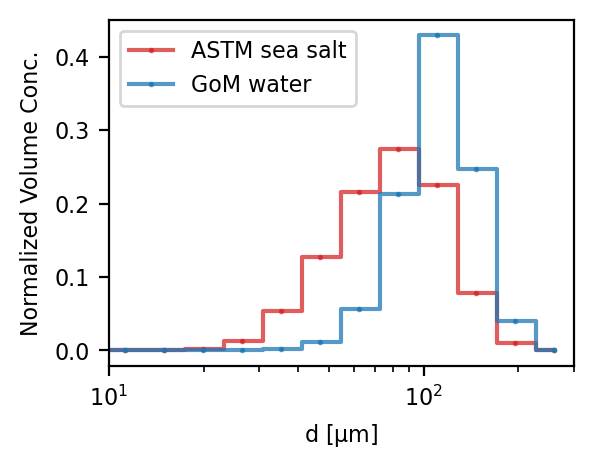

In [5]:
# plot particle size histogram

minn1 = 60
minn2 = 150 
nmin = 40

subset1 = datafr1.iloc[:,minn1-1: minn1-1+nmin]
subset_np1 = subset1.to_numpy()
subset_mash1 = subset_np1.flatten()
subset_mash1 = subset_mash1[~np.isnan(subset_mash1)]

subset2 = datafr2.iloc[:,minn2-1: minn2-1+nmin]
subset_np2 = subset2.to_numpy()
subset_mash2 = subset_np2.flatten()
subset_mash2 = subset_mash2[~np.isnan(subset_mash2)]

xlim = 300
xlim = np.log(xlim)
nbins = 20

#########################logs#############
subset_mash_1= np.log(subset_mash1)
subset_mash_2= np.log(subset_mash2)

a1,b1 = np.histogram(subset_mash_1, bins = nbins, range=(0,xlim))
base1 = (b1[:-1]+b1[1:])/2
a_weighted1 = a1*(np.exp(base1))**3
a_weighted_norm1= a_weighted1/np.sum(a_weighted1)
width1 = 1*(b1[1:] - b1[:-1])

a2,b2 = np.histogram(subset_mash_2, bins = nbins, range=(0,xlim))
base2 = (b2[:-1]+b2[1:])/2
a_weighted2 = a2*(np.exp(base2))**3
a_weighted_norm2= a_weighted2/np.sum(a_weighted2)
width2 = 1*(b2[1:] - b2[:-1])

xloc = 160
ylim = 0.35

fig02, ax1 = plt.subplots(figsize=(wHP,hHP))

base_exp = np.exp(base1)

plt.step(base_exp, a_weighted_norm1, where='mid', marker='o', markersize=1, linestyle = '-', alpha = 0.75 ,color = 'C3', label='ASTM sea salt')
plt.step(base_exp, a_weighted_norm2, where='mid', marker='o', markersize=1, linestyle = '-', alpha = 0.75 ,color = 'C0', label='GoM water')
plt.legend()
plt.xscale('log')

plt.ylabel ('Normalized Volume Conc.')
plt.xlabel('d [$\mathregular{\mu m}$]')
plt.xlim([10,300])

fig.tight_layout() 
plt.savefig('Figures/PSD_GoM_ASTM.pdf',bbox_inches="tight", pad_inches=0.005) # comment out if you don't want to save it;

### d vs C for different G and salinity

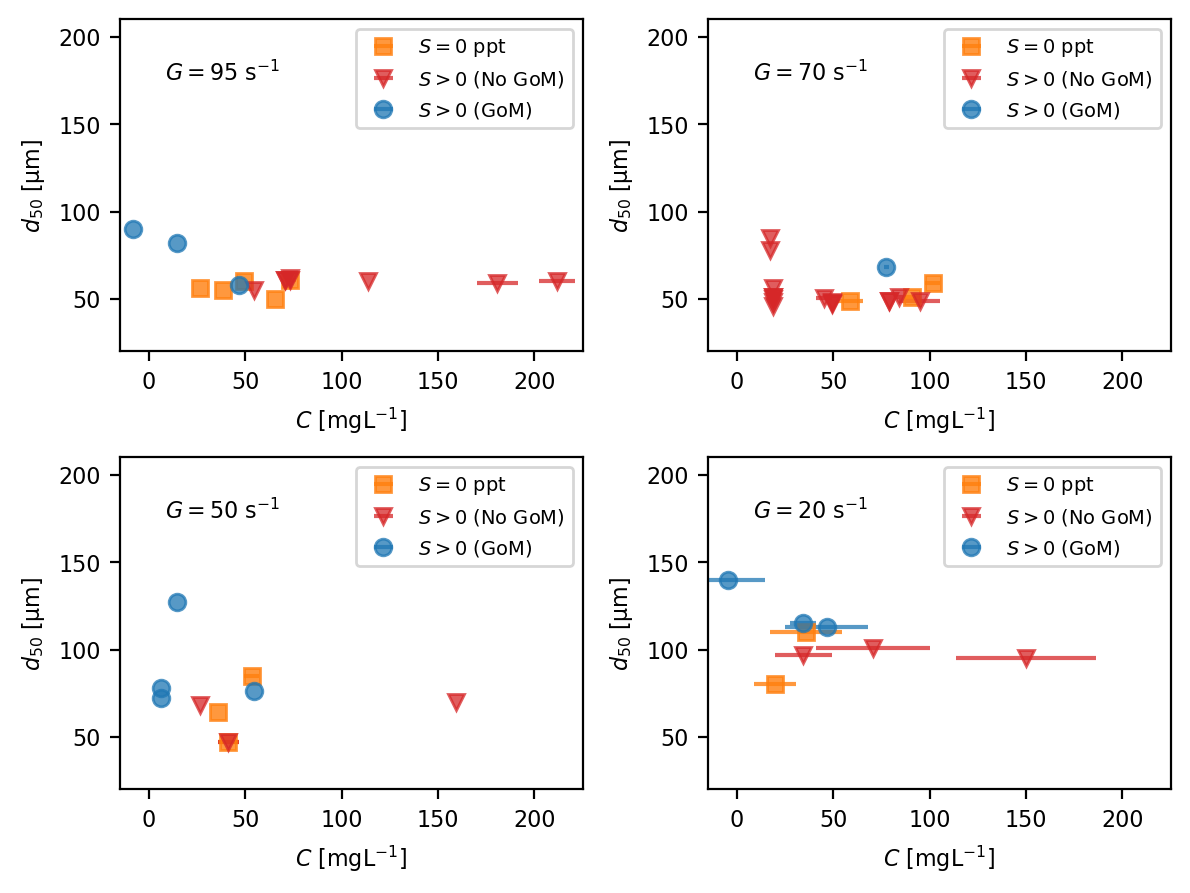

In [6]:
cmin = -15
cmax = 225
dmin = 20
dmax = 210
xtext  = 5

fig, ax = plt.subplots(2,2,figsize=(2*wHP,2*hHP))

Glevel = 95

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[0,0].errorbar(set1['C_eq_avg_mgL'], set1['d50_eq_um'], 
            xerr=[set1.C_eq_low_minus_mgL,set1.C_eq_high_plus_mgL], fmt='s',color='C1', alpha=0.8, label='$S=0$ ppt')
ax[0,0].errorbar(set2['C_eq_avg_mgL'], set2['d50_eq_um'], 
            xerr=[set2.C_eq_low_minus_mgL,set2.C_eq_high_plus_mgL], fmt='v',color='C3', alpha=0.75, label='$S>0$ (No GoM)')
ax[0,0].errorbar(set3['C_eq_avg_mgL'], set3['d50_eq_um'], 
            xerr=[set3.C_eq_low_minus_mgL,set3.C_eq_high_plus_mgL], fmt='o',color='C0', alpha=0.75, label='$S>0$ (GoM)')

ax[0,0].text(xtext,175,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[0,0].set_xlabel('$C$ [$\mathrm{mgL^{-1}}$]')
ax[0,0].set_ylabel('$d_{50}$ [µm]')
ax[0,0].set_xlim(cmin,cmax)
ax[0,0].set_ylim(dmin,dmax)
ax[0,0].legend(fontsize="7")

Glevel = 50

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[1,0].errorbar(set1['C_eq_avg_mgL'], set1['d50_eq_um'], 
            xerr=[set1.C_eq_low_minus_mgL,set1.C_eq_high_plus_mgL], fmt='s',color='C1', alpha=0.8, label='$S=0$ ppt')
ax[1,0].errorbar(set2['C_eq_avg_mgL'], set2['d50_eq_um'], 
            xerr=[set2.C_eq_low_minus_mgL,set2.C_eq_high_plus_mgL], fmt='v',color='C3', alpha=0.75, label='$S>0$ (No GoM)')
ax[1,0].errorbar(set3['C_eq_avg_mgL'], set3['d50_eq_um'], 
            xerr=[set3.C_eq_low_minus_mgL,set3.C_eq_high_plus_mgL], fmt='o',color='C0', alpha=0.75, label='$S>0$ (GoM)')

ax[1,0].text(xtext,175,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[1,0].set_xlabel('$C$ [$\mathrm{mgL^{-1}}$]')
ax[1,0].set_ylabel('$d_{50}$ [µm]')
ax[1,0].set_xlim(cmin,cmax)
ax[1,0].set_ylim(dmin,dmax)
ax[1,0].legend(fontsize="7")

Glevel = 70

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[0,1].errorbar(set1['C_eq_avg_mgL'], set1['d50_eq_um'], 
            xerr=[set1.C_eq_low_minus_mgL,set1.C_eq_high_plus_mgL], fmt='s',color='C1', alpha=0.8, label='$S=0$ ppt')
ax[0,1].errorbar(set2['C_eq_avg_mgL'], set2['d50_eq_um'], 
            xerr=[set2.C_eq_low_minus_mgL,set2.C_eq_high_plus_mgL], fmt='v',color='C3', alpha=0.75, label='$S>0$ (No GoM)')
ax[0,1].errorbar(set3['C_eq_avg_mgL'], set3['d50_eq_um'], 
            xerr=[set3.C_eq_low_minus_mgL,set3.C_eq_high_plus_mgL], fmt='o',color='C0', alpha=0.75, label='$S>0$ (GoM)')

ax[0,1].text(xtext,175,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[0,1].set_xlabel('$C$ [$\mathrm{mgL^{-1}}$]')
ax[0,1].set_ylabel('$d_{50}$ [µm]')
ax[0,1].set_xlim(cmin,cmax)
ax[0,1].set_ylim(dmin,dmax)
ax[0,1].legend(fontsize="7")

Glevel = 20

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[1,1].errorbar(set1['C_eq_avg_mgL'], set1['d50_eq_um'], 
            xerr=[set1.C_eq_low_minus_mgL,set1.C_eq_high_plus_mgL], fmt='s',color='C1', alpha=0.8, label='$S=0$ ppt')
ax[1,1].errorbar(set2['C_eq_avg_mgL'], set2['d50_eq_um'], 
            xerr=[set2.C_eq_low_minus_mgL,set2.C_eq_high_plus_mgL], fmt='v',color='C3', alpha=0.75, label='$S>0$ (No GoM)')
ax[1,1].errorbar(set3['C_eq_avg_mgL'], set3['d50_eq_um'], 
            xerr=[set3.C_eq_low_minus_mgL,set3.C_eq_high_plus_mgL], fmt='o',color='C0', alpha=0.75, label='$S>0$ (GoM)')

ax[1,1].text(xtext,175,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[1,1].set_xlabel('$C$ [$\mathrm{mgL^{-1}}$]')
ax[1,1].set_ylabel('$d_{50}$ [µm]')
ax[1,1].set_xlim(cmin,cmax)
ax[1,1].set_ylim(dmin,dmax)
ax[1,1].legend(fontsize="7")

fig.tight_layout() 
plt.savefig('Figures/d_C_by_salt_type_G_4Panel.pdf',bbox_inches="tight", pad_inches=0.005) # comment out if you don't want to save it;

### d vs S for different G and salinity

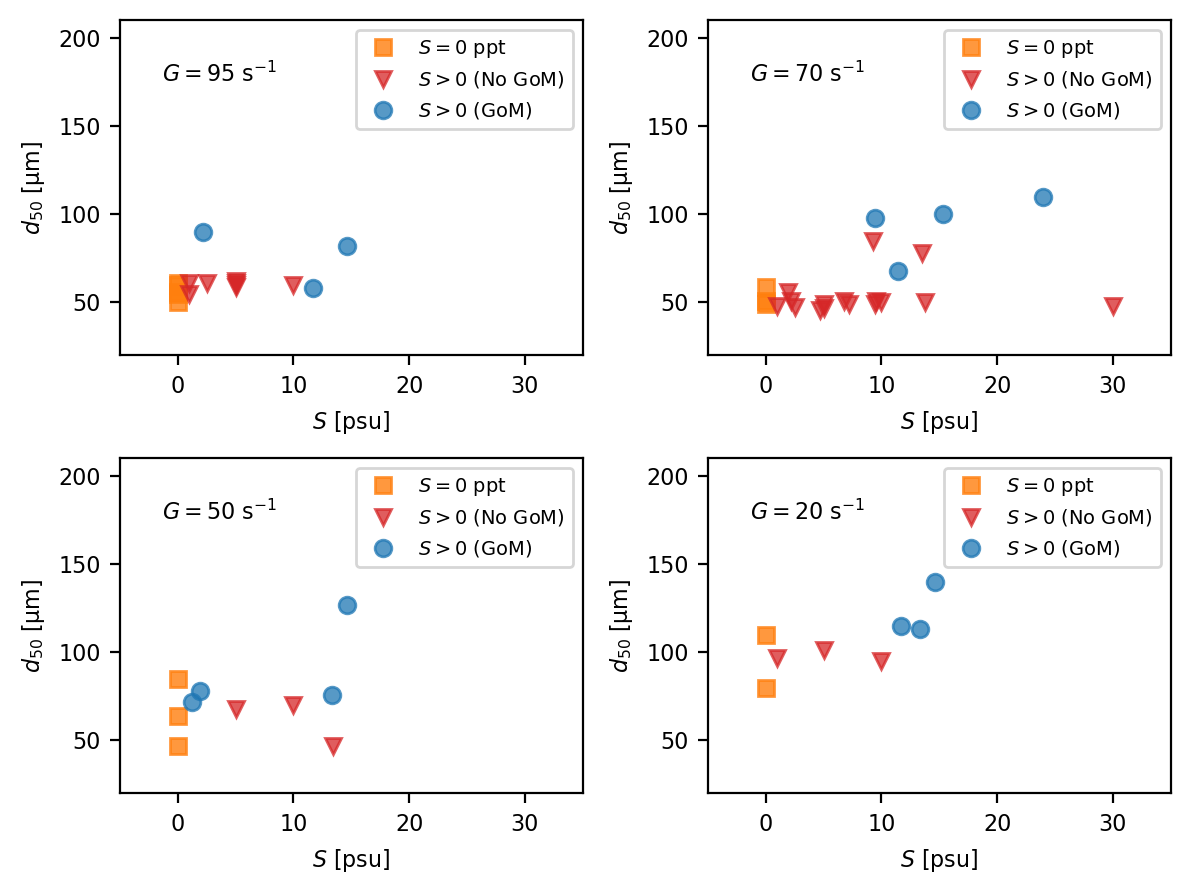

In [7]:
Smin = -5
Smax = 35
dmin = 20
dmax = 210
xtext  = -2

fig, ax = plt.subplots(2,2,figsize=(2*wHP,2*hHP))

Glevel = 95

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[0,0].plot(set1['S_eq_ppt'], set1['d50_eq_um'],
        color='C1', marker='s', linestyle='none', alpha=0.8,  label='$S=0$ ppt')
ax[0,0].plot(set2['S_eq_ppt'], set2['d50_eq_um'],
        color='C3', marker='v', linestyle='none', alpha=0.75, label='$S>0$ (No GoM)')
ax[0,0].plot(set3['S_eq_ppt'], set3['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.75, label='$S>0$ (GoM)')
ax[0,0].text(xtext,175,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'
ax[0,0].set_xlabel('$S$ [psu]')
ax[0,0].set_ylabel('$d_{50}$ [µm]')
ax[0,0].set_xlim(Smin,Smax)
ax[0,0].set_ylim(dmin,dmax)
ax[0,0].legend(fontsize="7")

Glevel = 50

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[1,0].plot(set1['S_eq_ppt'], set1['d50_eq_um'],
        color='C1', marker='s', linestyle='none', alpha=0.8,  label='$S=0$ ppt')
ax[1,0].plot(set2['S_eq_ppt'], set2['d50_eq_um'],
        color='C3', marker='v', linestyle='none', alpha=0.75, label='$S>0$ (No GoM)')
ax[1,0].plot(set3['S_eq_ppt'], set3['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.75, label='$S>0$ (GoM)')
ax[1,0].text(xtext,175,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[1,0].set_xlabel('$S$ [psu]')
ax[1,0].set_ylabel('$d_{50}$ [µm]')
ax[1,0].set_xlim(Smin,Smax)
ax[1,0].set_ylim(dmin,dmax)
ax[1,0].legend(fontsize="7")

Glevel = 70

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[0,1].plot(set1['S_eq_ppt'], set1['d50_eq_um'],
        color='C1', marker='s', linestyle='none', alpha=0.8,  label='$S=0$ ppt')
ax[0,1].plot(set2['S_eq_ppt'], set2['d50_eq_um'],
        color='C3', marker='v', linestyle='none', alpha=0.75, label='$S>0$ (No GoM)')
ax[0,1].plot(set3['S_eq_ppt'], set3['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.75, label='$S>0$ (GoM)')
ax[0,1].text(xtext,175,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[0,1].set_xlabel('$S$ [psu]')
ax[0,1].set_ylabel('$d_{50}$ [µm]')
ax[0,1].set_xlim(Smin,Smax)
ax[0,1].set_ylim(dmin,dmax)
ax[0,1].legend(fontsize="7")

Glevel = 20

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[1,1].plot(set1['S_eq_ppt'], set1['d50_eq_um'],
        color='C1', marker='s', linestyle='none', alpha=0.8,  label='$S=0$ ppt')
ax[1,1].plot(set2['S_eq_ppt'], set2['d50_eq_um'],
        color='C3', marker='v', linestyle='none', alpha=0.75, label='$S>0$ (No GoM)')
ax[1,1].plot(set3['S_eq_ppt'], set3['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.75, label='$S>0$ (GoM)')
ax[1,1].text(xtext,175,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[1,1].set_xlabel('$S$ [psu]')
ax[1,1].set_ylabel('$d_{50}$ [µm]')
ax[1,1].set_xlim(Smin,Smax)
ax[1,1].set_ylim(dmin,dmax)
ax[1,1].legend(fontsize="7")

fig.tight_layout() 
plt.savefig('Figures/d_S_by_salt_type_byG_4Panel.pdf',bbox_inches="tight", pad_inches=0.005) # comment out if you don't want to save it;

### Settling rate vs d and salinity

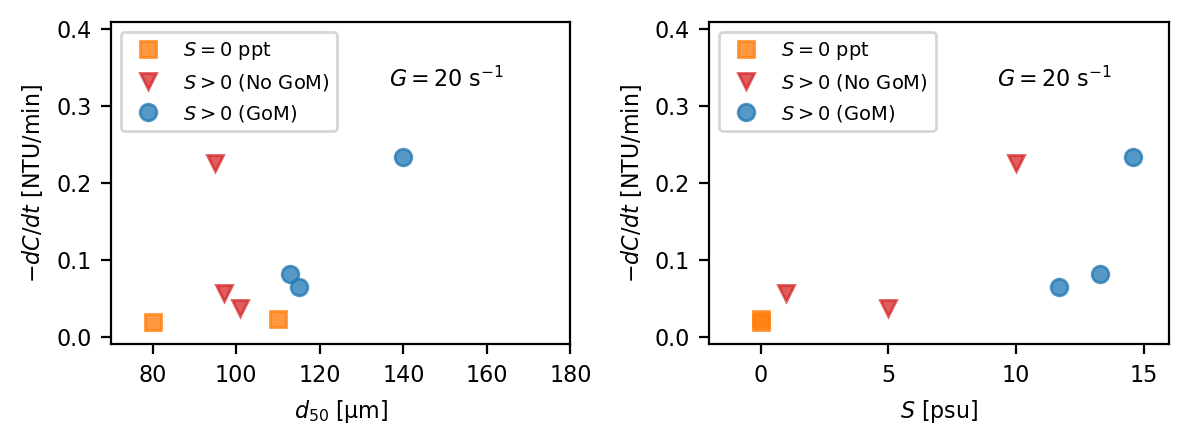

In [8]:
Glevel = 20

dmin = 70
dmax = 180

Smin = -2
Smax = 16

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(2*wHP,hHP))

set1 =S0[(S0['G_eq_Hz'] == Glevel)].copy()
set2 =GoM_no[(GoM_no['G_eq_Hz'] == Glevel)].copy()
set3 =GoM_yes[(GoM_yes['G_eq_Hz'] == Glevel)].copy()

ax[0].plot(set1['d50_eq_um'], abs(set1['DC/Dt_NTU_min']), 
        color='C1', marker='s', linestyle='none', alpha=0.8,  label='$S=0$ ppt')
ax[0].plot(set2['d50_eq_um'], abs(set2['DC/Dt_NTU_min']), 
        color='C3', marker='v', linestyle='none', alpha=0.75, label='$S>0$ (No GoM)')
ax[0].plot(set3['d50_eq_um'], abs(set3['DC/Dt_NTU_min']),
        color='C0', marker='o', linestyle='none', alpha=0.75, label='$S>0$ (GoM)')
ax[0].text(xtext,175,' $G=$'+str(Glevel)+' Hz', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[0].set_xlabel('$d_{50}$ [µm]')
ax[0].set_ylabel('$-dC/dt$ [NTU/min]')
ax[0].set_xlim(dmin,dmax)
ax[0].set_ylim(-0.01,max(abs(data['DC/Dt_NTU_min']))+0.75*max(abs(data['DC/Dt_NTU_min'])))
ax[0].legend(fontsize="7", loc=2)

ax[0].text(135,0.325,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[1].plot(set1['S_eq_ppt'], abs(set1['DC/Dt_NTU_min']), 
        color='C1', marker='s', linestyle='none', alpha=0.8,  label='$S=0$ ppt')
ax[1].plot(set2['S_eq_ppt'], abs(set2['DC/Dt_NTU_min']), 
        color='C3', marker='v', linestyle='none', alpha=0.75, label='$S>0$ (No GoM)')
ax[1].plot(set3['S_eq_ppt'], abs(set3['DC/Dt_NTU_min']),
        color='C0', marker='o', linestyle='none', alpha=0.75, label='$S>0$ (GoM)')
ax[1].text(xtext,175,' $G=$'+str(Glevel)+' Hz', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[1].set_xlabel('$S$ [psu]')
ax[1].set_ylabel('$-dC/dt$ [NTU/min]')
ax[1].set_xlim(Smin,Smax)
ax[1].set_ylim(-0.01,max(abs(data['DC/Dt_NTU_min']))+0.75*max(abs(data['DC/Dt_NTU_min'])))
ax[1].legend(fontsize="7", loc=2)

ax[1].text(9,0.325,' $G=$'+str(Glevel)+' $\mathrm{s^{-1}}$', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

fig.tight_layout() 
plt.savefig('Figures/dCdt_d50_dCdt_S_by_salt_type.pdf',bbox_inches="tight", pad_inches=0.005) # comment out if you don't want to save it;

### Size vs G broken down by season

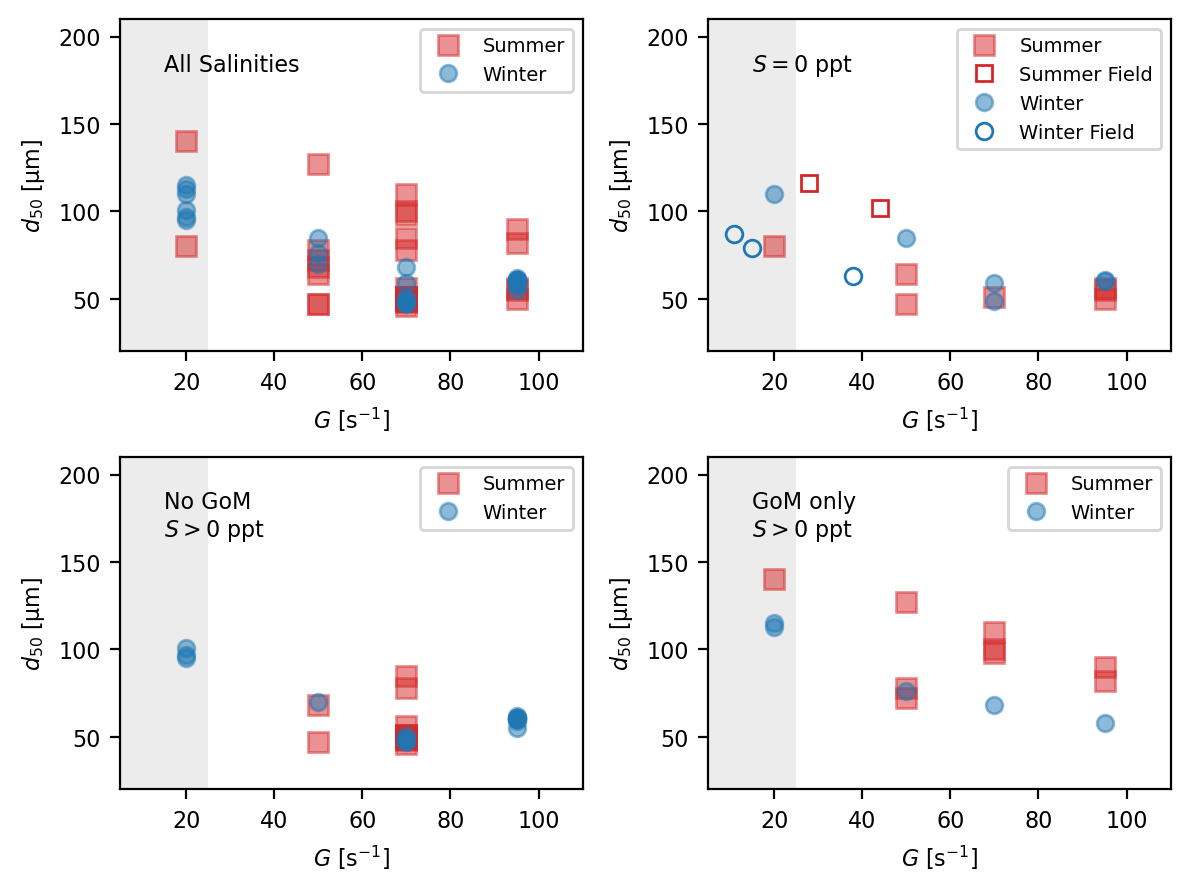

In [9]:
Gmin = 5
Gmax = 110

dmin = 20
dmax = 210

# all season plot

fig, ax = plt.subplots(2,2,figsize=(2*wHP,2*hHP))

ax[0,0].plot(summer_all['G_eq_Hz'], summer_all['d50_eq_um'],
        color='C3', marker='s', linestyle='none', ms = 7, alpha=0.5,  label='Summer')
ax[0,0].plot(winter_all['G_eq_Hz'], winter_all['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.5, label='Winter')

ax[0,0].text(15,180,'All Salinities', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[0,0].axvspan(Gmin, 25, color='gray', alpha=0.15, lw=0)
ax[0,0].set_xlabel('$G$ [$\mathrm{s^{-1}}$]')
ax[0,0].set_ylabel('$d_{50}$ [µm]')
ax[0,0].set_xlim(Gmin,Gmax)
ax[0,0].set_ylim(dmin,dmax)
ax[0,0].legend(fontsize="7")

ax[0,1].plot(summer_fresh['G_eq_Hz'], summer_fresh['d50_eq_um'],
        color='C3', marker='s', linestyle='none', ms = 7, alpha=0.5,  label='Summer')
ax[0,1].plot(summer_MS['G_Hz'], summer_MS['D50_micron'],
             color='none', marker='s',mec='C3', linestyle='none', alpha=1,  label='Summer Field')

ax[0,1].plot(winter_fresh['G_eq_Hz'], winter_fresh['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.5, label='Winter')
ax[0,1].plot(winter_MS['G_Hz'], winter_MS['D50_micron'],
             color='none', marker='o',mec='C0', linestyle='none', alpha=1,  label='Winter Field')

ax[0,1].text(15,180,'$S=0$ ppt', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[0,1].axvspan(Gmin, 25, color='gray', alpha=0.15, lw=0)
ax[0,1].set_xlabel('$G$ [$\mathrm{s^{-1}}$]')
ax[0,1].set_ylabel('$d_{50}$ [µm]')
ax[0,1].set_xlim(Gmin,Gmax)
ax[0,1].set_ylim(dmin,dmax)
ax[0,1].legend(fontsize="7")

ax[1,0].plot(summer_GoM_no['G_eq_Hz'], summer_GoM_no['d50_eq_um'],
        color='C3', marker='s', linestyle='none', ms = 7, alpha=0.5,  label='Summer')
ax[1,0].plot(winter_GoM_no['G_eq_Hz'], winter_GoM_no['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.5, label='Winter')
ax[1,0].text(15,165,'No GoM\n$S>0$ ppt', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

ax[1,0].axvspan(Gmin, 25, color='gray', alpha=0.15, lw=0)
ax[1,0].set_xlabel('$G$ [$\mathrm{s^{-1}}$]')
ax[1,0].set_ylabel('$d_{50}$ [µm]')
ax[1,0].set_xlim(Gmin,Gmax)
ax[1,0].set_ylim(dmin,dmax)
ax[1,0].legend(fontsize="7")

ax[1,1].plot(summer_GoM['G_eq_Hz'], summer_GoM['d50_eq_um'],
        color='C3', marker='s', linestyle='none', ms = 7, alpha=0.5,  label='Summer')
ax[1,1].plot(winter_GoM['G_eq_Hz'], winter_GoM['d50_eq_um'],
        color='C0', marker='o', linestyle='none', alpha=0.5, label='Winter')
ax[1,1].text(15,165,'GoM only\n$S>0$ ppt', # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

# ax[1,1].plot(summer_MS['G_Hz'], summer_MS['D50_micron'],
#              color='none', marker='s',mec='black', linestyle='none', alpha=1,  label='Summer Field')
# ax[1,1].plot(winter_MS['G_Hz'], winter_MS['D50_micron'],
#              color='none', marker='o',mec='black', linestyle='none', alpha=1,  label='Winter Field')

ax[1,1].axvspan(Gmin, 25, color='gray', alpha=0.15, lw=0)
ax[1,1].set_xlabel('$G$ [$\mathrm{s^{-1}}$]')
ax[1,1].set_ylabel('$d_{50}$ [µm]')
ax[1,1].set_xlim(Gmin,Gmax)
ax[1,1].set_ylim(dmin,dmax)
ax[1,1].legend(fontsize="7")

fig.tight_layout() 
plt.savefig('Figures/Season_d50_G_S_4Panel.pdf',bbox_inches="tight", pad_inches=0.005) # comment out if you don't want to save it;